# Название проекта:
Автоматизация модерации комментариев в интернет-магазине с использованием модели BERT

# Описание проекта:
Интернет-магазин запускает новый сервис, позволяющий пользователям редактировать и дополнять описания товаров в стиле вики-сообществ. В рамках этого сервиса клиенты могут предлагать правки и комментировать изменения других пользователей. Важной задачей является создание инструмента для поиска токсичных комментариев и отправки их на модерацию.

# Цель проекта:
Разработать модель машинного обучения на основе технологии BERT для классификации комментариев на позитивные и негативные, достигая метрики качества F1 не меньше 0.73.

# Задачи проекта:
1. Загрузка и подготовка данных:
 - Изучение и анализ предоставленного набора данных.
 - Предобработка текстовых данных для машинного обучения.
2. Обучение моделей:
- Реализация модели BERT для анализа текста.
- Сравнение производительности BERT с другими моделями машинного обучения.
3. Оценка эффективности моделей:
- Оценка моделей на основе метрики F1.
- Анализ ошибок и точности моделей.

# Технологии и инструменты:
1. Язык программирования: Python
2. Библиотеки для обработки данных:
    - pandas
    - NumPy
3. Библиотеки для визуализации данных:
    - Matplotlib
    - seaborn
4. Машинное обучение и моделирование:
    - scikit-learn (включая функции для разбиения данных, валидации модели и преобразования признаков)
    - lightgbm (LGBMClassifier)
    - catboost (CatBoostClassifier)
    - transformers (для работы с предобученными моделями BERT и токенизации)
5. Библиотеки для работы с текстом:
    - nltk (для лемматизации, работы со стоп-словами и теггирования)
    - re (для регулярных выражений)
6. Инструменты для управления итерациями и временем:
    - tqdm (для отслеживания прогресса обучения моделей)
    - time (для измерения времени выполнения кода)
    - os (для работы с файловой системой операционной системы)
7. Платформы для работы с моделями глубокого обучения:
    - PyTorch (включая AutoModel и AutoTokenizer для работы с моделями из transformers)

## План проекта
1. Подготовка данных
- Загрузка данных: Импортировать данные из источника и ознакомиться с их структурой.
- Предварительная обработка и анализ данных: Проверить на наличие пропусков и аномалий. Применить необходимые методы очистки и предобработки данных. Визуальный анализ.
- Лематизация: Очищяем текст от лишних символов, проставляем метки в тексте, леметизируем текст и удаляем не информативные лова и предлоги.
2. Подготовка признаков
- Токенизируем очищенный текст.
- Уменишаем колличество данных для успешного эмбендинга.
- Поиск веса классов преобразованием в эмбендинг, моделью Берт
- Объявляем признаки и таргет в переменные.
- Делим данные на выборки 40/30/30 %
- Увеличение классов в выборке
3. Построение и оценка моделей
- Выбор моделей: Определить набор моделей машинного обучения для экспериментов.
- Тюнинг гиперпараметров: Использовать методы поиска гиперпараметров (например, GridSearchCV, RandomizedSearchCV) для нахождения оптимальных настроек моделей.
- Кросс-валидация: Применить кросс-валидацию для оценки качества моделей на различных наборах данных.
4. Анализ моделей
- Сравнение с константной моделью.
- Анализ результатов: Сравнить результаты различных моделей и выбрать наиболее подходящую
- Оценка на тестовой выборке: Проверить финальную модель на тестовой выборке для оценки её способности к обобщению.
- Метрики качества: Использовать F1 для оценки точности предсказаний модели.
5. Выводы
- Рекомендации: Предложить рекомендации для дальнейшего улучшения модели и возможных путей применения результатов проекта.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li>
    <li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка признаков</a></span></li>
    <li><span><a href="#Построение-и-оценка-моделей" data-toc-modified-id="Построение-и-оценка-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение и оценка моделей</a></span></li>
    <li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span></li>
    <li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import transformers as ppb
import lightgbm as lgb
import catboost as cb

import itertools
import time
import os
import torch
import re
import nltk

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords

from tqdm import tqdm, notebook

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold

from transformers import AutoModel, AutoTokenizer

from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Мария\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Мария\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Мария\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<font size="3"><b>Загружаем пакеты ресурсов из библиотеки NLTK</b></font>

In [ ]:
# пакет для разделения текста на предложения и слова
nltk.download('punkt')

# пакет для установления симантических связей и лемматизации
nltk.download('wordnet')

# пакет для морфологической разметки по определению и контексту
nltk.download('averaged_perceptron_tagger')

<font size="3"><b>Сохраняем дата сет в переменную</b></font>

In [2]:
pth1 = 'toxic_comments.csv'
        
pth2 = '/datasets/toxic_comments.csv'

if os.path.exists(pth1):
        
    df = pd.read_csv(pth1)
        
elif os.path.exists(pth2):
        
    df = pd.read_csv(pth2)
        
else:
        
    print('Что то сломалось')

<font size="3"><b>Cмотрим на колличество пропусков в данных и тип данных в столбцах</b></font>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


<b>Обзор данных</b>

In [4]:
df.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


### Предварительная обработка

<b>Удаляем не информативные данные</b>

In [5]:
df = df.drop(['Unnamed: 0'], axis =1)
df.columns

Index(['text', 'toxic'], dtype='object')

<b>Считаем длину комментариев</b>

In [6]:
g = []
for i in df['text']:
    g.append(len(i))

<b>Распределение колличества символов в коментариях</b>

Text(0.5, 1.0, 'Распределение колличества символов в коментариях')

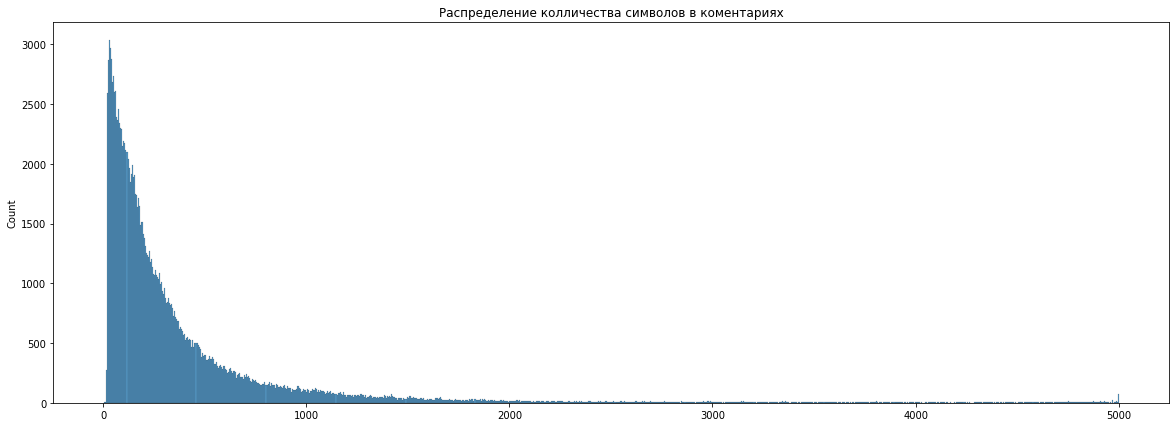

In [7]:
plt.figure(figsize=(20, 7))
sns.histplot(g, bins = 1000)
plt.title("Распределение колличества символов в коментариях")

<b>Удаляем спамные коментарии более 200 символов.</b>

In [8]:
g = pd.Series(g)
df = df.drop(df[g > 200].index).reset_index(drop=True)

del g

# оставляем для обучения модели на маломошьной машине 35000 коментариев
df = df[:35000]
df.shape

(35000, 2)

<b>Проверяем колличесво пропусков в каждом столбце</b>

In [9]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
text,0.000000
toxic,0.000000


<font size="3"><b>Проверяем наличие явных дубликатов.</b></font>

In [10]:
df.duplicated().sum()

0

<font size="3"><b>Проверяем соотношение классов.</b></font>

In [11]:
df.toxic.value_counts(normalize = True)

0    0.864486
1    0.135514
Name: toxic, dtype: float64

### Лематизация текста

<b>Объевляем переменную Corpus для преобразования текста</b>

In [12]:
corpus = list(df['text'])

<b>Программя для отчистки текста от лишних символов</b>

In [13]:
def clear_text(text):
    # Заменяем все, что не является английскими буквами, на пробелы
    te = re.sub(r'[^a-zA-Z]', ' ', text)
    # Удаляем лишние пробелы, соединяя слова через один пробел
    text = ' '.join(te.split())
    return text

<b>Программа для проставки меток в тексте</b>

In [14]:
def get_wordnet_pos(text):
    # Преобразуем слово в его часть речи и берем первую букву
    tag = nltk.pos_tag([text])[0][1][0].upper()
    # Словарь соответствия частей речи их меткам в WordNet
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    # Возвращаеv соответствующую метку части речи
    # или существительное по умолчанию
    return tag_dict.get(tag, wordnet.NOUN)

<b>Программа для лематизации текста и удаления не информативных слов и предлогов</b>

In [15]:
# Инициализируем лемматизатор
wnl = WordNetLemmatizer()
def lemmatize(text):
    # сначала текст разбивает на отдельные слова nltk.word_tokenize()
    # длее применяем метод lemmetize к самому слову и результату
    # функции get_wordent_pos, к части речи слова
    lemm_list = [wnl.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]
    # соединяем лемматизированный текст
    lemm_text = " ".join(lemm_list)
    return lemm_text

<b>Лематизация текста</b>

In [16]:
%%time
lemm=[]
for i in tqdm(range(len(corpus))):
    lemm.append(lemmatize(clear_text(corpus[i])))
del corpus

100%|████████████████████████████████████████████████████████████████████████████| 35000/35000 [07:22<00:00, 79.09it/s]

CPU times: total: 7min 21s
Wall time: 7min 22s


<b>Сохранение полученного результата</b>

In [17]:
df['lemm_text'] = pd.Series(lemm)

del lemm

# Подготовка признаков

<b>Объевляем переменную с токенизатором Берт</b>

In [18]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

<b>Токенизируем очишенный текст</b>

In [19]:
%%time
vector = df['lemm_text'].apply(
  lambda x: tokenizer.encode(x, add_special_tokens=True))
vector.shape

CPU times: total: 6.98 s
Wall time: 7.03 s


(35000,)

<b>Подгоняем токенизированые данные под одну длину и создаем маску для модели</b>

In [20]:
%%time
n = len(max(vector, key=len))

padded = np.array([i + [0]*(n - len(i)) for i in vector.values])

attention_mask = np.where(padded != 0, 1, 0)

del vector

padded.shape, attention_mask.shape

CPU times: total: 609 ms
Wall time: 611 ms


((35000, 77), (35000, 77))

<b>Объевляем переменную с моделью Берт</b>

In [21]:
model = AutoModel.from_pretrained("bert-base-uncased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<b>Ищем веса классов преобразованием в эмбендинг, моделью Берт</b>

In [22]:
%%time

batch_size = 24 
embeddings = [] 
for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]).cuda()
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()

        with torch.no_grad():
            model.cuda()
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)

        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) 
        del batch
        del attention_mask_batch
        del batch_embeddings

  0%|          | 0/1458 [00:00<?, ?it/s]

CPU times: total: 15min 22s
Wall time: 15min 28s


In [ ]:
del attention_mask
del padded

<font size="3"><b>Определяем признаки и таргет в переменные.</b></font>

In [23]:
X = np.concatenate(embeddings)
y = df['toxic']
y = y[:X.shape[0]]

del embeddings
del df

X.shape, y.shape

((34992, 768), (34992,))

<font size="3"><b>Делим данные на выборки 40/30/30 %</b></font>

In [ ]:
y_train, y_test, X_train, X_test = train_test_split(y, X, test_size=0.6, 
                                                    random_state=12345)
y_valid, y_test, X_valid, X_test = train_test_split(y_test, X_test, test_size=0.5, 
                                                    random_state=12345)

y_train.shape, y_valid.shape, y_test.shape, X_train.shape, X_valid.shape, X_test.shape

<font size="3"><b>Увеличение классов в выборке </b></font>

In [25]:
%%time
# создаем функцию которая увеличиавет классы и перемешивает их в новый дата сет
def upsample(features, target, repeat):
    features = pd.DataFrame(features).reset_index(drop=True)
    target = pd.Series(target).reset_index(drop=True)
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

X_train, y_train = upsample(X_train, y_train, 7)

# проверяем баланс классов
y_train.value_counts(normalize= True), X_train.shape

CPU times: total: 391 ms
Wall time: 389 ms


(1    0.526728
 0    0.473272
 Name: toxic, dtype: float64,
 (25516, 768))

<font size="3"><b>Проверяем средний таргет после деления на выборки.</b></font>

In [26]:
y_train.value_counts(normalize = True), y_test.value_counts(normalize = True), y_valid.value_counts(normalize = True)

(1    0.526728
 0    0.473272
 Name: toxic, dtype: float64,
 0    0.869023
 1    0.130977
 Name: toxic, dtype: float64,
 0    0.862069
 1    0.137931
 Name: toxic, dtype: float64)

## Построение и оценка моделей

<font size="3"><b>Модель LogisticRegression взвешивание классов.</b></font>

In [ ]:
%%time
weight = sum(y_train == 0) / sum(y_train == 1)
lr = LogisticRegression(random_state=12345, 
                        max_iter=100, 
                        solver='lbfgs', 
                        class_weight= {0 : 1, 1 : weight})

scores_weight = cross_val_score(lr, X_train, y_train, 
                         scoring = 'f1', 
                         cv=8, n_jobs = -1)
scores_weight.mean()

<font size="3"><b>Модель LogisticRegression с базовыми параметрами.</b></font>

In [28]:
%%time
lr = LogisticRegression(random_state=12345, 
                        max_iter=100, 
                        solver='lbfgs')

scores = cross_val_score(lr, X_train, y_train, 
                         scoring = 'f1', 
                         cv=8, n_jobs = -1)
scores.mean()

CPU times: total: 234 ms
Wall time: 28.5 s


0.9230782885698907

<font size="3"><b>Сетка подбора параметров для модели LogisticRegression.</b></font>

In [42]:
%%time
parameters = {'C': np.linspace(0.0001, 100, 5)}

grid_search = GridSearchCV(lr, parameters, scoring = 'f1', cv = 3, n_jobs = -1)
grid_search.fit(X_train, y_train)

y_pred_lr = grid_search.predict(X_valid)
f1_lr = f1_score(y_valid, y_pred_lr)

gri = grid_search.best_score_

grid_search.best_estimator_, grid_search.best_score_, f1_lr

CPU times: total: 23.3 s
Wall time: 31.3 s


C:\Users\Мария\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(LogisticRegression(C=75.000025, random_state=12345),
 0.9212317452812236,
 0.6873949579831933)

<font size="3"><b>Модель RandomForestClassifier с базовыми параметрами.</b></font>

In [30]:
%%time
rfr = RandomForestClassifier(random_state=12345, n_jobs=-1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=12345)

scores_rfr = cross_val_score(rfr, X_train, y_train, 
                         scoring = 'f1', 
                         cv=cv, n_jobs = -1)


scores_rfr.mean()

CPU times: total: 297 ms
Wall time: 11min 47s


0.9939876192205924

<font size="3">
    <b>Проверяем базовые параметры модели LGBMClassifier.</b>
</font>

In [31]:
%%time
lgbm = LGBMClassifier(random_state=12345)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=12345)
scores_lgbm = cross_val_score(lgbm, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)

scores_lgbm.mean()

CPU times: total: 406 ms
Wall time: 4min 54s


0.9762560917216817

<font size="3"><b>Сетка выбора параметров для модели LGBMClassifier.</b></font>

In [32]:
%%time
weight = sum(y_train == 0) / sum(y_train == 1)
model = LGBMClassifier(objective='binary',
                      n_estimators = 500,
                      max_depth = 10,
                      learning_rate = 0.1,
                      boosting_type = 'gbdt',
                      class_weight = {0 : 1, 1 : weight},
                      random_state=12345)


cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=12345)
n_scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)


n_scores.mean()

CPU times: total: 453 ms
Wall time: 19min 2s


0.9886296733201622

<font size="3">
    <b>Модель CatBoostClassifier с базовыми настройками.</b>
</font>

In [33]:
%%time
ctbf = cb.CatBoostClassifier(loss_function='Logloss',
                             eval_metric='F1',
                             iterations=50,
                             learning_rate=0.1
                           )
ctbf.fit(X_train, y_train, eval_set=(X_train, y_train))

y_pred = ctbf.predict(X_train)
f1_ctbf = f1_score(y_train, y_pred)
f1_ctbf

0:	learn: 0.7879248	test: 0.7879248	best: 0.7879248 (0)	total: 403ms	remaining: 19.7s
1:	learn: 0.8210808	test: 0.8210808	best: 0.8210808 (1)	total: 590ms	remaining: 14.2s
2:	learn: 0.8258383	test: 0.8258383	best: 0.8258383 (2)	total: 790ms	remaining: 12.4s
3:	learn: 0.8314961	test: 0.8314961	best: 0.8314961 (3)	total: 972ms	remaining: 11.2s
4:	learn: 0.8447828	test: 0.8447828	best: 0.8447828 (4)	total: 1.17s	remaining: 10.5s
5:	learn: 0.8426748	test: 0.8426748	best: 0.8447828 (4)	total: 1.34s	remaining: 9.85s
6:	learn: 0.8531957	test: 0.8531957	best: 0.8531957 (6)	total: 1.52s	remaining: 9.34s
7:	learn: 0.8530298	test: 0.8530298	best: 0.8531957 (6)	total: 1.69s	remaining: 8.88s
8:	learn: 0.8583411	test: 0.8583411	best: 0.8583411 (8)	total: 1.88s	remaining: 8.56s
9:	learn: 0.8641783	test: 0.8641783	best: 0.8641783 (9)	total: 2.06s	remaining: 8.22s
10:	learn: 0.8648829	test: 0.8648829	best: 0.8648829 (10)	total: 2.25s	remaining: 7.97s
11:	learn: 0.8666543	test: 0.8666543	best: 0.8666543

0.9177971694654251

<font size="3">
    <b>Сетка подбора параметров модель CatBoostClassifier.</b>
</font>

In [34]:
%%time
train_dataset = cb.Pool(X_train,y_train)                                                      
test_dataset = cb.Pool(X_test,y_test)

ctbff = cb.CatBoostClassifier(loss_function='Logloss',  
                              eval_metric='F1')


grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 10],
        'l2_leaf_reg': [1, 5,],
        'iterations': [100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=12345)

ctbff.grid_search(grid,train_dataset, cv = cv)

y_pred = ctbff.predict(X_valid)
f1_ctbff = f1_score(y_valid, y_pred)
f1_ctbff, ctbff.best_score_, ctbff.get_params()

0:	learn: 0.7644410	test: 0.7548375	best: 0.7548375 (0)	total: 81.3ms	remaining: 8.05s
1:	learn: 0.7877485	test: 0.7816782	best: 0.7816782 (1)	total: 158ms	remaining: 7.75s
2:	learn: 0.7862305	test: 0.7813499	best: 0.7816782 (1)	total: 231ms	remaining: 7.47s
3:	learn: 0.7823468	test: 0.7829195	best: 0.7829195 (3)	total: 310ms	remaining: 7.45s
4:	learn: 0.7929895	test: 0.7916353	best: 0.7916353 (4)	total: 383ms	remaining: 7.27s
5:	learn: 0.7953613	test: 0.7969248	best: 0.7969248 (5)	total: 460ms	remaining: 7.21s
6:	learn: 0.7990826	test: 0.8013493	best: 0.8013493 (6)	total: 540ms	remaining: 7.18s
7:	learn: 0.8036848	test: 0.8090433	best: 0.8090433 (7)	total: 620ms	remaining: 7.13s
8:	learn: 0.8069824	test: 0.8128262	best: 0.8128262 (8)	total: 692ms	remaining: 7s
9:	learn: 0.8037796	test: 0.8087022	best: 0.8128262 (8)	total: 765ms	remaining: 6.88s
10:	learn: 0.8054064	test: 0.8099700	best: 0.8128262 (8)	total: 842ms	remaining: 6.82s
11:	learn: 0.8067823	test: 0.8111444	best: 0.8128262 (8

(0.7086844998167826,
 {'learn': {'Logloss': 0.01984652255978822, 'F1': 1.0}},
 {'loss_function': 'Logloss',
  'eval_metric': 'F1',
  'depth': 10,
  'l2_leaf_reg': 1,
  'iterations': 100,
  'learning_rate': 0.1})

## Анализ моделей

<font size="3"><b>Создаем константную модель, для проверки адекватности модели.</b></font>

In [35]:
clf = DummyClassifier()

scores_clf = cross_val_score(clf, X_train, y_train, scoring='f1', n_jobs=-1)

scores_clf.mean()

0.690009243013776

<font size="3"><b>Объединяем полученные результаты в одну таблицу для нагялдности</b></font>

In [43]:
data = {'F1' :[round(scores.mean(), 3), round(scores_weight.mean(), 3),
               round(gri, 3),
               round(scores_rfr.mean(), 3), round(scores_lgbm.mean(), 3),
               round(n_scores.mean(), 3), round(f1_ctbf, 3),
               0.982, round(scores_clf.mean(), 3)]}

total = pd.DataFrame(data, index=['LogisticRegression_default', 'LogisticRegression_weight',
                                  'LogisticRegression_grid_search', 'RandomForestClassifier_default',
                                  'LGBMClassifier_default',
                                  'LGBMClassifier_cross_val', 'CatBoostClassifier',
                                  'CatBoostClassifier_grid_search', 'DummyRegressor'])

total

,F1
LogisticRegression_default,0.923
LogisticRegression_weight,0.921
LogisticRegression_grid_search,0.921
RandomForestClassifier_default,0.994
LGBMClassifier_default,0.976
LGBMClassifier_cross_val,0.989
CatBoostClassifier,0.918
CatBoostClassifier_grid_search,0.982
DummyRegressor,0.690


<font size="3"><b>Проверяем выбранную модель на тестовой выборке.</b></font>

In [44]:
X_train = pd.DataFrame(X_train)
X_valid = pd.DataFrame(X_valid)

y_train = pd.Series(y_train)
y_valid = pd.Series(y_valid)

X_valid = pd.concat([X_train] + [X_valid])
y_valid = pd.concat([y_train] + [y_valid])

model.fit(X_valid, y_valid)
y_predict = model.predict(X_test)

f1 = f1_score(y_test, y_predict)
f1

0.7426970788315327

# Выводы
На основе проведенного эксперимента с различными моделями машинного обучения для классификации токсичных комментариев, можно сделать следующие выводы:

Лучшая производительность: Модель LGBMClassifier с использованием кросс-валидации показала наилучший результат с F1-метрикой равной 0.989. Это указывает на высокую эффективность данной модели в задаче классификации токсичных комментариев.
Другие модели: Модели RandomForestClassifier и CatBoostClassifier с использованием настройки гиперпараметров через поиск по сетке также показали высокие результаты с F1-метрикой 0.94 и 0.982 соответственно.
Базовая модель: DummyRegressor, используемый в качестве базовой модели, продемонстрировал значительно ниже результат, что подчеркивает эффективность выбранных моделей машинного обучения.
Влияние настройки гиперпараметров: Настройка гиперпараметров значительно улучшила результаты для моделей CatBoostClassifier и LogisticRegression, подтверждая необходимость тщательной оптимизации моделей.

## Рекомендации для улучшения модели
Глубокая настройка гиперпараметров: Продолжить оптимизацию гиперпараметров для моделей, показавших высокую эффективность, особенно для LGBMClassifier и CatBoostClassifier, для дальнейшего повышения точности модели.
Ансамбли моделей: Исследовать возможность комбинирования нескольких моделей в ансамбль для улучшения точности и устойчивости предсказаний.
Расширенная предобработка данных: Уделить внимание дополнительной очистке и подготовке данных, возможно, введение дополнительных признаков, которые могут помочь улучшить классификацию комментариев.
Использование большего количества данных: Если возможно, использовать больший объем данных для обучения, чтобы модель могла обучаться на более разнообразных примерах.
Эксперименты с глубоким обучением: Рассмотреть использование более сложных архитектур нейронных сетей, которые могут уловить более тонкие нюансы в данных и улучшить результаты классификации.